<h1>Exploratory Data Analysis(EDA) - Laptop Pricing Dataset</h1>

In [1]:
#import libraries

import pandas as pd                #to clean and read data
import numpy as np                 #to manipulate the data
import matplotlib.pyplot as plt    #to plot the data
import seaborn as sns              #to visualize the statistical data
from scipy import stats            #to perform statistical operations
%matplotlib inline

In [2]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [3]:
#read_file

df = pd.read_csv(filepath)
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [4]:
#generate regression plots for: 
# "CPU_frequency", "Screen_Size_inch", "Weight_pounds"aganist "Price"

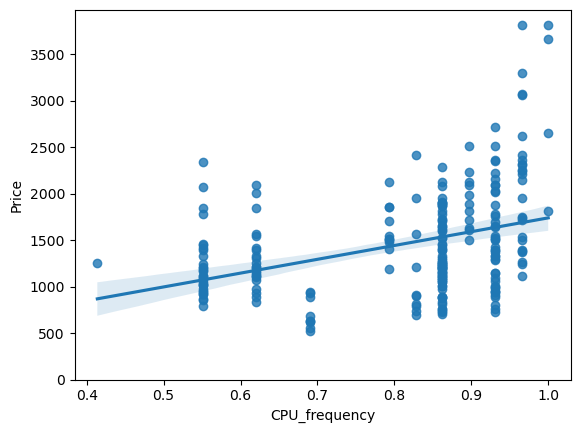

In [5]:
sns.regplot(x = "CPU_frequency", y = "Price", data = df)
plt.ylim(0,)
plt.show()

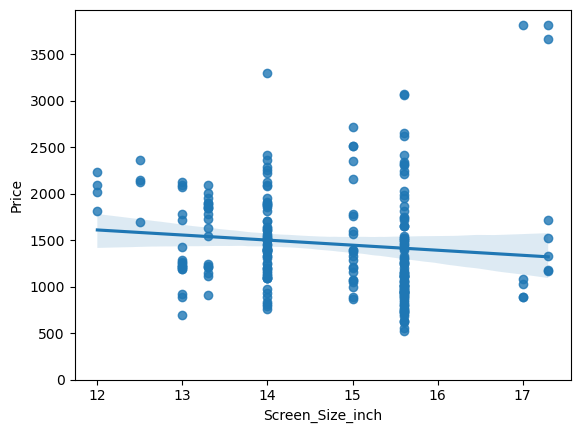

In [6]:
sns.regplot(x = "Screen_Size_inch", y = "Price", data = df)
plt.ylim(0,)
plt.show()

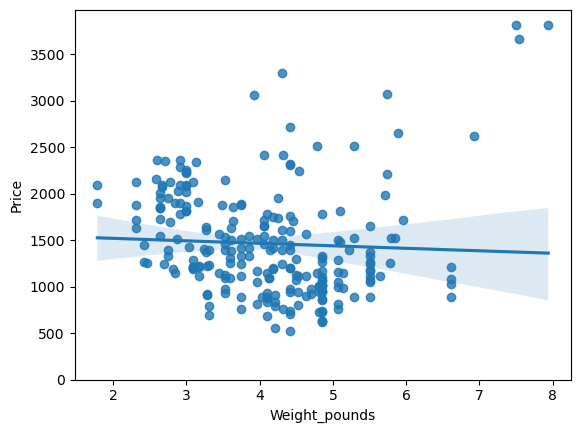

In [7]:
sns.regplot(x = "Weight_pounds", y = "Price", data = df)
plt.ylim(0,)
plt.show()

Interpretation: "CPU_frequency" has a 36% positive correlation with the price of the laptops. The other two parameters have weak correlation with price.

In [8]:
#correlation for "CPU_frequency", "Screen_Size_inch","Weight_pounds" aganist "Price"

for column in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
    print(f"Correlation of Price and {column} is ", df[[column,"Price"]].corr())

Correlation of Price and CPU_frequency is                 CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
Correlation of Price and Screen_Size_inch is                    Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
Correlation of Price and Weight_pounds is                 Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


In [9]:
#generate boxplots to define categorical values for : 
# "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD" aganist "Price"

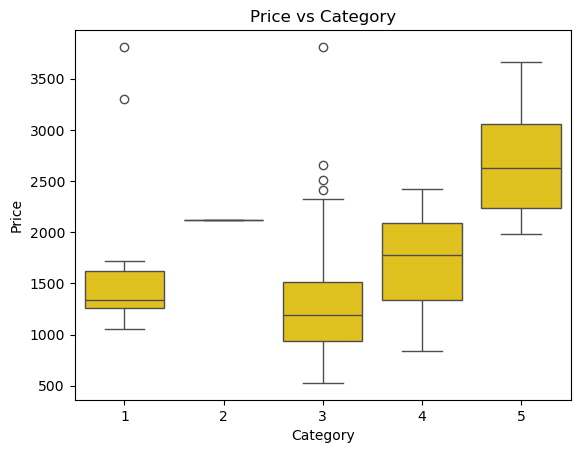

In [10]:
sns.boxplot(x = "Category", y = "Price", data = df, color = 'gold' )
plt.title("Price vs Category")
plt.show()

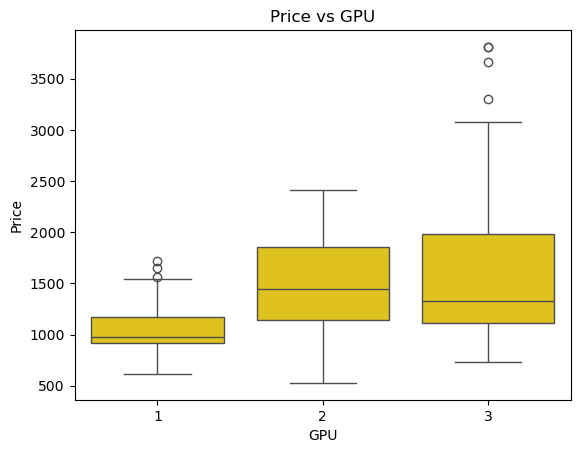

In [11]:
sns.boxplot(x = "GPU", y = "Price", data = df, color = 'gold' )
plt.title("Price vs GPU")
plt.show()

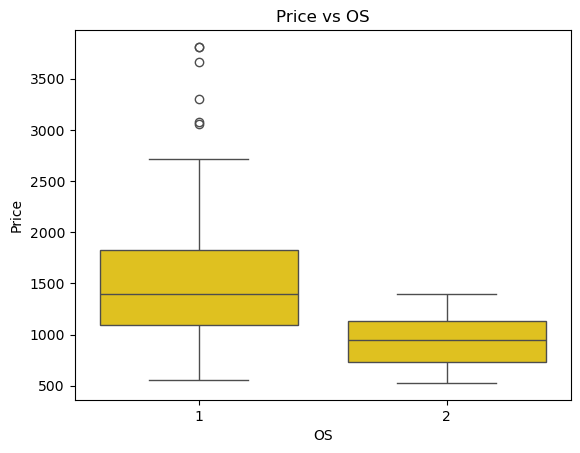

In [12]:
sns.boxplot(x = "OS", y = "Price", data = df, color = 'gold' )
plt.title("Price vs OS")
plt.show()

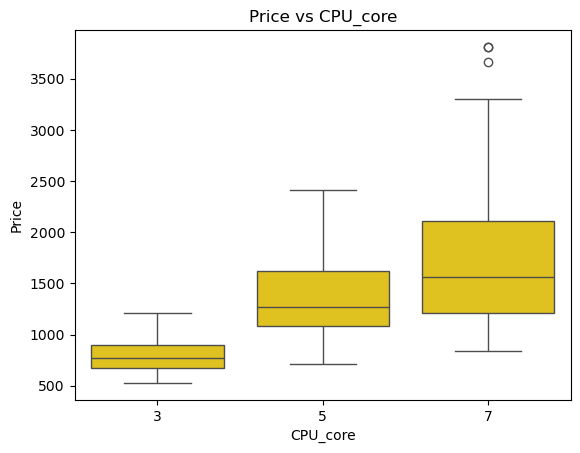

In [13]:
sns.boxplot(x = "CPU_core", y = "Price", data = df, color = 'gold' )
plt.title("Price vs CPU_core")
plt.show()

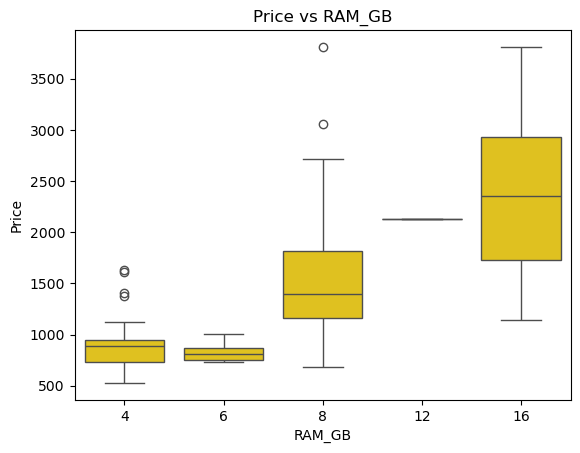

In [14]:
sns.boxplot(x = "RAM_GB", y = "Price", data = df, color = 'gold' )
plt.title("Price vs RAM_GB")
plt.show()

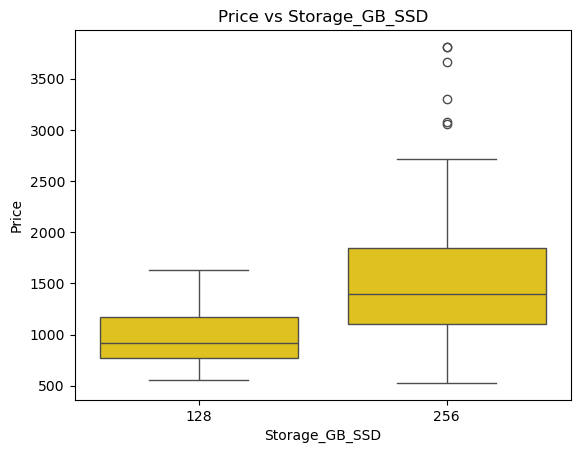

In [15]:
sns.boxplot(x = "Storage_GB_SSD", y = "Price", data = df, color = 'gold' )
plt.title("Price vs Storage_GB_SSD")
plt.show()

In [23]:
#describe data

print(df.describe(include = ["object"]))

       Manufacturer Price-binned
count           238          238
unique           11            3
top            Dell          Low
freq             71          160


In [17]:
#grouping data using groupby:

test_grp = df[["GPU","CPU_core","Price"]]
grp_by = test_grp.groupby(["GPU","CPU_core"], as_index = False).mean()
grp_by

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [18]:
#create pivot table:

pvt_grp = grp_by.pivot(index = "GPU", columns = "CPU_core")
pvt_grp

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

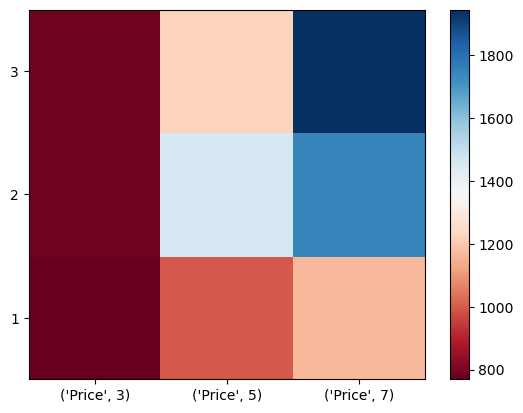

In [19]:
#plot to visualize the Pivot data

fig, ax = plt.subplots()
im = ax.pcolor(pvt_grp, cmap='RdBu')

#label names
row_labels = pvt_grp.columns
col_labels = pvt_grp.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pvt_grp.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pvt_grp.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
plt.show()

In [20]:
#checking Pearson correlation coefficient and P_Values:

for column in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[column],df['Price'])
    print(column)
    print("The pearson correlation coefficient for",column,"is",pearson_coef,"with p-value:", p_value)

RAM_GB
The pearson correlation coefficient for RAM_GB is 0.5492972971857846 with p-value: 3.68156062884271e-20
CPU_frequency
The pearson correlation coefficient for CPU_frequency is 0.3666655589258862 with p-value: 5.502463350713293e-09
Storage_GB_SSD
The pearson correlation coefficient for Storage_GB_SSD is 0.24342075521810294 with p-value: 0.00014898923191724166
Screen_Size_inch
The pearson correlation coefficient for Screen_Size_inch is -0.1106442081711829 with p-value: 0.08853397846830684
Weight_pounds
The pearson correlation coefficient for Weight_pounds is -0.05031225837751546 with p-value: 0.4397693853433896
CPU_core
The pearson correlation coefficient for CPU_core is 0.4593977773355116 with p-value: 7.912950127009037e-14
OS
The pearson correlation coefficient for OS is -0.2217298011482738 with p-value: 0.0005696642559246758
GPU
The pearson correlation coefficient for GPU is 0.2882981988881426 with p-value: 6.166949698364507e-06
Category
The pearson correlation coefficient for C